In [1]:
# Kutibxonalardi tortib olamiz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [2]:
# dataset ornatib olamiz
df = pd.read_csv("adultincomedatase.csv")

In [17]:
# data bilan tanishib chiqamiz
df.head(1)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [18]:
# data bilan tanishib chiqamiz
df.tail(1)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48841,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# data bilan tanishib chiqamiz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# data bilan tanishib chiqamiz
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.drop('fnlwgt', axis=1, inplace=True)

In [9]:
df.head(1)


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [10]:
# Null qiymatlarni tekshib olamiz

df.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [12]:
# Check cardinality of categorical columns
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in categorical_cols:
    print(f"Cardinality of '{col}': {df[col].nunique()}")

Cardinality of 'workclass': 9
Cardinality of 'education': 16
Cardinality of 'marital-status': 7
Cardinality of 'occupation': 15
Cardinality of 'relationship': 6
Cardinality of 'race': 5
Cardinality of 'gender': 2
Cardinality of 'native-country': 42
Cardinality of 'income': 2


In [13]:
# cardinality ni koramiz
cardinality=df[categorical_cols].nunique()

In [14]:
#tekshiramiz
cardinality

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
gender             2
native-country    42
income             2
dtype: int64

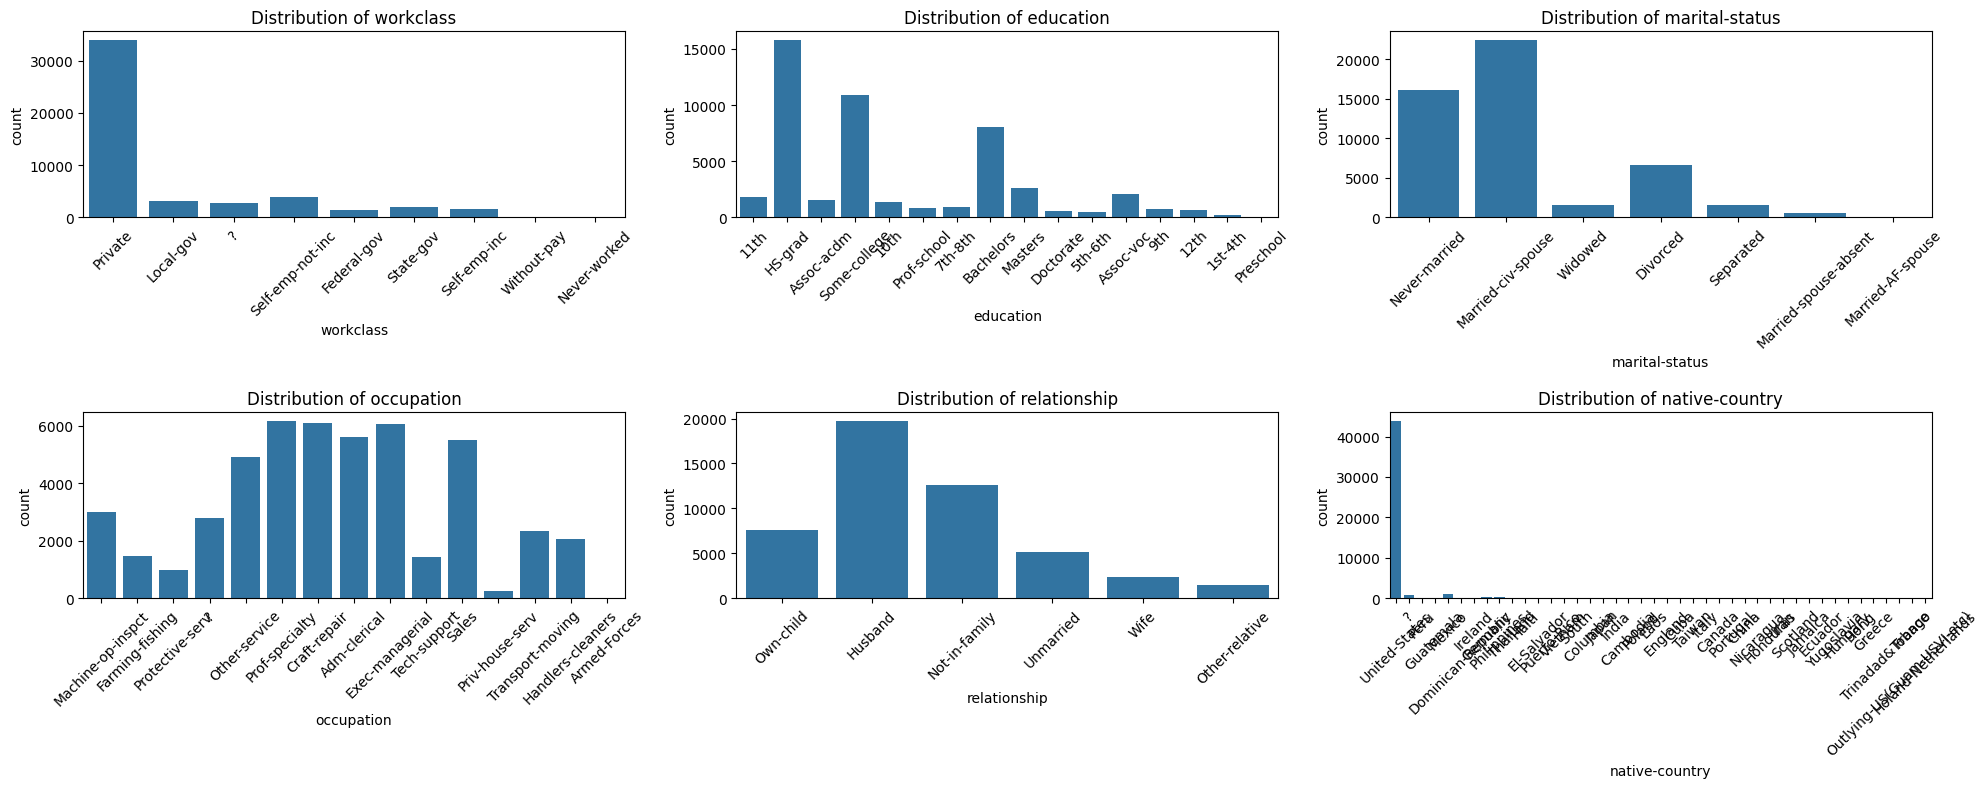

In [96]:
# ploting
plt.figure(figsize=(20, 10))


for i, col in enumerate(high_cardinality_cols, 1):
    plt.subplot(len(high_cardinality_cols) // 3 + 1, 3, i)  
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


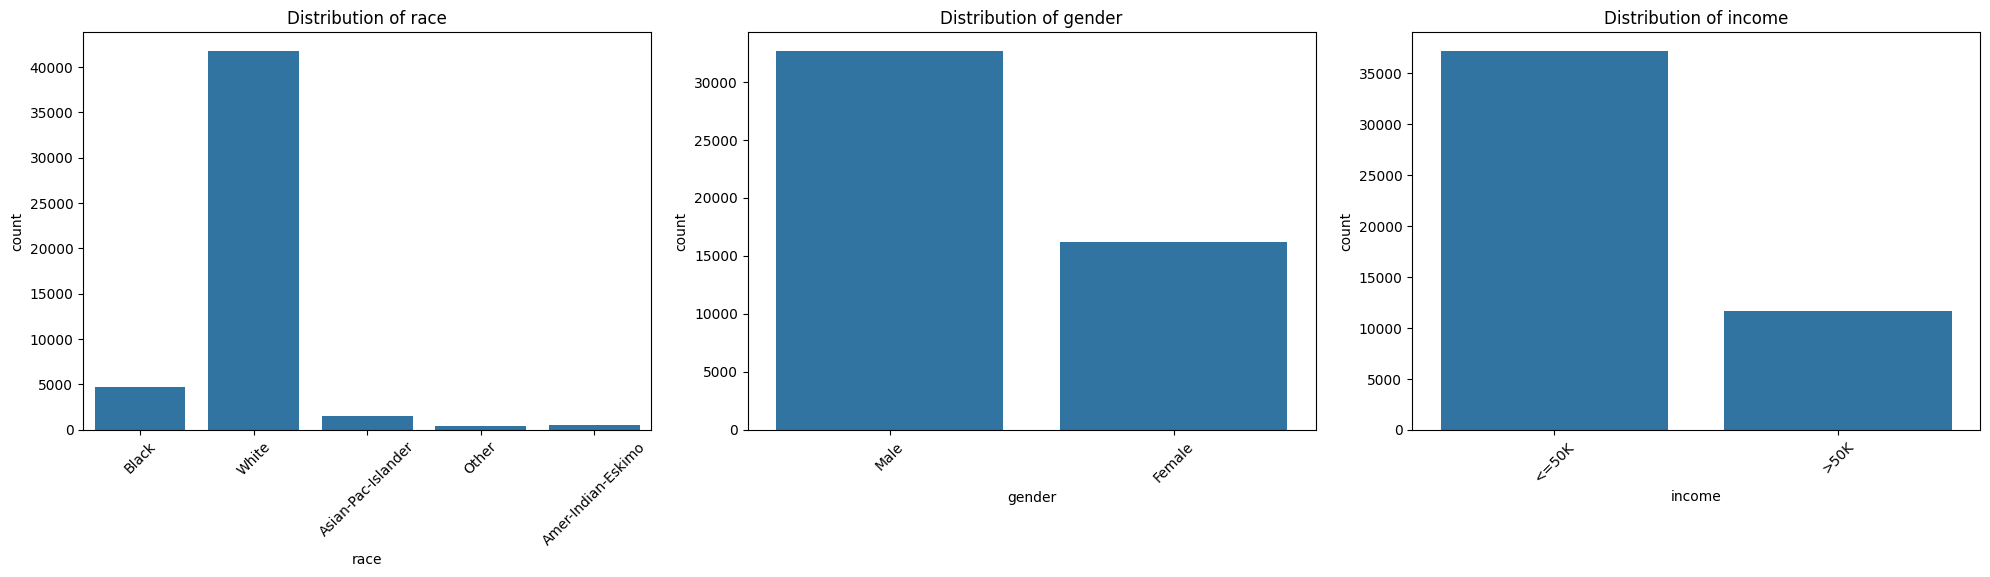

In [98]:

plt.figure(figsize=(20, 10))


for i, col in enumerate(low_cardinality_cols, 1):
    plt.subplot(len(low_cardinality_cols) // 3 + 1, 3, i) 
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45) 


plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

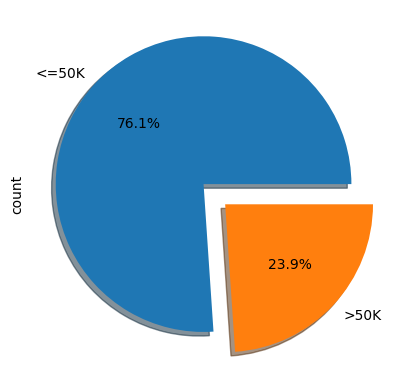

In [15]:
df['income'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0.1, 0.1], shadow=True)

<Axes: ylabel='count'>

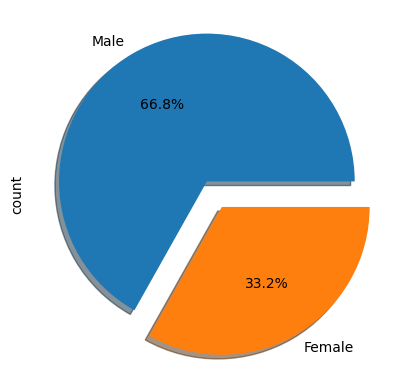

In [16]:
df['gender'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0.1, 0.1], shadow=True)

In [19]:
# categorical qiymatlarni numerical qiymatga otkazib olamiz

categorical_col=df.select_dtypes(include=['object', 'category']).columns
label_encoder=LabelEncoder()
for col in categorical_col:
    df[col]=label_encoder.fit_transform(df[col])

In [20]:
#Numericalga otganmi yoqmi tekshiramiz

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   education        48842 non-null  int64
 3   educational-num  48842 non-null  int64
 4   marital-status   48842 non-null  int64
 5   occupation       48842 non-null  int64
 6   relationship     48842 non-null  int64
 7   race             48842 non-null  int64
 8   gender           48842 non-null  int64
 9   capital-gain     48842 non-null  int64
 10  capital-loss     48842 non-null  int64
 11  hours-per-week   48842 non-null  int64
 12  native-country   48842 non-null  int64
 13  income           48842 non-null  int64
dtypes: int64(14)
memory usage: 5.2 MB


In [28]:
#x va y ni aniqlash
x=df.drop('income',axis=1)

In [29]:
# Income columngacha bolganni teskhiramiz

x.head(1)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,1,7,4,7,3,2,1,0,0,40,39


In [30]:
y=df['income']

In [31]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [33]:
# Step 1: Split into 70% training and 30% temp
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# Step 2: Split the temp set into 50% validation and 50% test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [34]:
len(x_train)

34189

In [35]:
len(x_val)

7326

In [37]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr=lr.predict(x_test)

In [40]:
mse_lr=mean_squared_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)

In [41]:
print(mse_lr)
print(r2_lr)

0.13187964485376374
0.27055770892906383


In [43]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
y_pred_dt=dt.predict(x_test)

In [46]:
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)

In [47]:
print(mse_dt)
print(r2_dt)

0.16741843408684914
0.07398836065083247


In [49]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [50]:
y_pred_rf=rf.predict(x_test)

In [51]:
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)

In [52]:
print(mse_rf)
print(r2_rf)

0.10489834247012175
0.41979456082251076


In [54]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [55]:
y_pred_knn = knn.predict(x_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [56]:
print("KNN MSE:", mse_knn)
print("KNN R2:", r2_knn)

KNN MSE: 0.11136890951276102
KNN R2: 0.3840050706904695


In [57]:
#Scaler qilb olamiz

scaler=StandardScaler()

In [58]:
x_train_scaled=scaler.fit_transform(x_train)

# Modelni improve qilish uchun datani tayyorlaymiz va scaler qilb olamiz

x_test_scaled=scaler.fit_transform(x_test)
x_val_scaled=scaler.transform(x_val)

In [59]:
len(x_train_scaled)

34189

In [60]:
len(x_train)

34189

In [61]:

# Create new ratio columns
df['CapitalLoss_to_Hours'] = df['capital-loss'] / df['hours-per-week']
df['CapitalGain_to_Age'] = df['capital-gain'] / df['age']
df['CapitalGain_to_Hours'] = df['capital-gain'] / df['hours-per-week']


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   48842 non-null  int64  
 1   workclass             48842 non-null  int64  
 2   education             48842 non-null  int64  
 3   educational-num       48842 non-null  int64  
 4   marital-status        48842 non-null  int64  
 5   occupation            48842 non-null  int64  
 6   relationship          48842 non-null  int64  
 7   race                  48842 non-null  int64  
 8   gender                48842 non-null  int64  
 9   capital-gain          48842 non-null  int64  
 10  capital-loss          48842 non-null  int64  
 11  hours-per-week        48842 non-null  int64  
 12  native-country        48842 non-null  int64  
 13  income                48842 non-null  int64  
 14  CapitalLoss_to_Hours  48842 non-null  float64
 15  CapitalGain_to_Age 

In [64]:
X = df.drop(columns=['income'])  
y = df['income'] 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [65]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 0.13164911799230644
Linear Regression R2: 0.27183278092490715


In [69]:
0.13187964485376374
0.27055770892906383

0.27055770892906383

In [66]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("DT:", mse_dt)
print("DT:", r2_dt)

DT: 0.1653604066995601
DT: 0.0853715594313228


In [ ]:
0.16741843408684914
0.07398836065083247

In [67]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("RF MSE:", mse_rf)
print("RF R2:", r2_rf)

RF MSE: 0.1051794438236336
RF R2: 0.41823975518471723


In [ ]:
0.10489834247012175
0.41979456082251076

In [68]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("knn MSE:", mse_knn)
print("knn R2:", r2_knn)

knn MSE: 0.11169646512897503
knn R2: 0.38219332089838254


In [ ]:
KNN MSE: 0.11136890951276102
KNN R2: 0.3840050706904695